In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Loading data

In [2]:
dfParticipants = pd.read_csv("R-SED_data/participants.csv", delimiter=",", index_col=0)

In [3]:
dfJudgements = pd.read_csv("R-SED_data/triplet_judgements.csv", delimiter=",", index_col=0)

In [4]:
dfTriplets = pd.read_csv("R-SED_data/triplets.csv", delimiter=",", index_col=0)

In [5]:
dfAll = dfParticipants.join(dfJudgements.reset_index().set_index("user_id"), how="inner")
dfAll = dfAll.reset_index().set_index("triplet_id").join(dfTriplets, how="inner").reset_index().set_index("judgement_id")
dfAll.head(3)

,triplet_id,user_id,age_group,education,ml_expert,choice,simplified_choice,option_one_path,option_two_path,time_spent,handheld,window_width,window_height,user_agent,model,target_path,candidate1_path,candidate2_path,candidate1_bin,candidate2_bin,W2VVExtractor_cosdist_query_candidate1,W2VVExtractor_cosdist_query_candidate2,W2VVExtractor_cosdist_candidates,W2VVExtractor_eucldist_query_candidate1,W2VVExtractor_eucldist_query_candidate2,W2VVExtractor_eucldist_candidates,CIELABPositionalExctractor_regions_2x2_cosdist_query_candidate1,CIELABPositionalExctractor_regions_2x2_cosdist_query_candidate2,CIELABPositionalExctractor_regions_2x2_cosdist_candidates,CIELABPositionalExctractor_regions_2x2_eucldist_query_candidate1,CIELABPositionalExctractor_regions_2x2_eucldist_query_candidate2,CIELABPositionalExctractor_regions_2x2_eucldist_candidates,VLADExctractor__cosdist_query_candidate1,VLADExctractor__cosdist_query_candidate2,VLADExctractor__cosdist_candidates,VLADExctractor__eucldist_query_candidate1,VLADExctractor__eucldist_query_candidate2,VLADExctractor__eucldist_candidates,RGBHistogramExtractor_256_cosdist_query_candidate1,RGBHistogramExtractor_256_cosdist_query_candidate2,RGBHistogramExtractor_256_cosdist_candidates,RGBHistogramExtractor_256_eucldist_query_candidate1,RGBHistogramExtractor_256_eucldist_query_candidate2,RGBHistogramExtractor_256_eucldist_candidates,ConvNeXTExtractor_tiny_cosdist_query_candidate1,ConvNeXTExtractor_tiny_cosdist_query_candidate2,ConvNeXTExtractor_tiny_cosdist_candidates,ConvNeXTExtractor_tiny_eucldist_query_candidate1,ConvNeXTExtractor_tiny_eucldist_query_candidate2,ConvNeXTExtractor_tiny_eucldist_candidates,ViTExtractor_base_cosdist_query_candidate1,ViTExtractor_base_cosdist_query_candidate2,ViTExtractor_base_cosdist_candidates,ViTExtractor_base_eucldist_query_candidate1,ViTExtractor_base_eucldist_query_candidate2,ViTExtractor_base_eucldist_candidates,EfficientNetExtractor_0_cosdist_query_candidate1,EfficientNetExtractor_0_cosdist_query_candidate2,EfficientNetExtractor_0_cosdist_candidates,EfficientNetExtractor_0_eucldist_query_candidate1,EfficientNetExtractor_0_eucldist_query_candidate2,EfficientNetExtractor_0_eucldist_candidates,ConvNeXTExtractor_small_cosdist_query_candidate1,ConvNeXTExtractor_small_cosdist_query_candidate2,ConvNeXTExtractor_small_cosdist_candidates,ConvNeXTExtractor_small_eucldist_query_candidate1,ConvNeXTExtractor_small_eucldist_query_candidate2,ConvNeXTExtractor_small_eucldist_candidates,CIELABPositionalExctractor_regions_4x4_cosdist_query_candidate1,CIELABPositionalExctractor_regions_4x4_cosdist_query_candidate2,CIELABPositionalExctractor_regions_4x4_cosdist_candidates,CIELABPositionalExctractor_regions_4x4_eucldist_query_candidate1,CIELABPositionalExctractor_regions_4x4_eucldist_query_candidate2,CIELABPositionalExctractor_regions_4x4_eucldist_candidates,EfficientNetExtractor_4_cosdist_query_candidate1,EfficientNetExtractor_4_cosdist_query_candidate2,EfficientNetExtractor_4_cosdist_candidates,EfficientNetExtractor_4_eucldist_query_candidate1,EfficientNetExtractor_4_eucldist_query_candidate2,EfficientNetExtractor_4_eucldist_candidates,ConvNeXTExtractor_base_cosdist_query_candidate1,ConvNeXTExtractor_base_cosdist_query_candidate2,ConvNeXTExtractor_base_cosdist_candidates,ConvNeXTExtractor_base_eucldist_query_candidate1,ConvNeXTExtractor_base_eucldist_query_candidate2,ConvNeXTExtractor_base_eucldist_candidates,RGBHistogramExtractor_64_cosdist_query_candidate1,RGBHistogramExtractor_64_cosdist_query_candidate2,RGBHistogramExtractor_64_cosdist_candidates,RGBHistogramExtractor_64_eucldist_query_candidate1,RGBHistogramExtractor_64_eucldist_query_candidate2,RGBHistogramExtractor_64_eucldist_candidates,CLIPExtractor_medium_cosdist_query_candidate1,CLIPExtractor_medium_cosdist_query_candidate2,CLIPExtractor_medium_cosdist_candidates,CLIPExtractor_medium_eucldist_query_candidate1,CLIPExtractor_medium_eucldist_query_candidate2,CLIPExtractor_medium_eucldist_candidates,VANExtractor_base_cosdist_

# Basic participants demographics

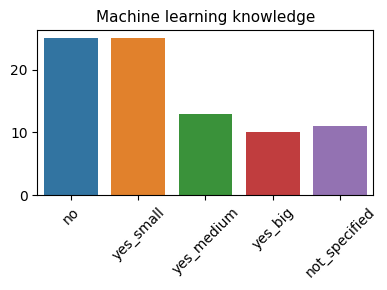

In [6]:
sns.countplot(data=dfParticipants, x="ml_expert", order=["no","yes_small","yes_medium","yes_big","not_specified"])
fig = plt.gcf()
fig.set_size_inches(4, 3)
plt.xticks(rotation = 45)
ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel("")

ax.set_title("Machine learning knowledge", fontsize=11)

plt.tight_layout()
plt.savefig("img/participants_ml.pdf")
plt.show()

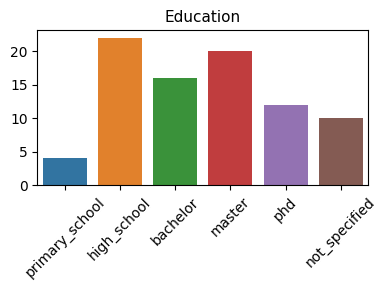

In [7]:
sns.countplot(data=dfParticipants, x="education", order=["primary_school","high_school","bachelor","master","phd","not_specified"])
fig = plt.gcf()
fig.set_size_inches(4, 3)
plt.xticks(rotation = 45)

ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel("")

ax.set_title("Education", fontsize=11)

plt.tight_layout()
plt.savefig("img/participants_edu.pdf")
plt.show()

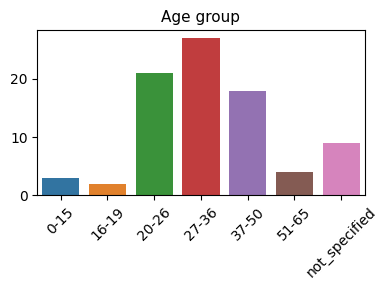

In [8]:
sns.countplot(data=dfParticipants, x="age_group", order=dfParticipants.age_group.sort_values().unique())
fig = plt.gcf()
fig.set_size_inches(4, 3)
plt.xticks(rotation = 45)

ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel("")

ax.set_title("Age group", fontsize=11)

plt.tight_layout()
plt.savefig("img/participants_age.pdf")
plt.show()

# Annotation count per participant

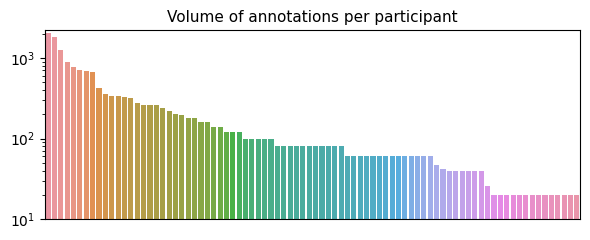

In [9]:
sns.countplot(data=dfAll, x="user_id", order = dfAll["user_id"].value_counts().index)
fig = plt.gcf()
fig.set_size_inches(6, 2.5)
plt.xticks(rotation = 45)

ax = plt.gca()
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_ylim(10,2200)
ax.set_yscale('log')


ax.set_title("Volume of annotations per participant", fontsize=11)

plt.tight_layout()
plt.savefig("img/participants_annotations.pdf")
plt.show()

In [10]:
dfAll["user_id"].value_counts().describe()

count      84.000000
mean      202.690476
std       346.165918
min        20.000000
25%        41.500000
50%        80.000000
75%       197.750000
max      2021.000000
Name: user_id, dtype: float64

- all participants completed at least 20 annotations (i.e., first level w.r.t. study gamification)
- 50% of participants completed at least 80 annotations
- approx. power-law distribution, mean at 200 annotations

# Participant's judgement statistics

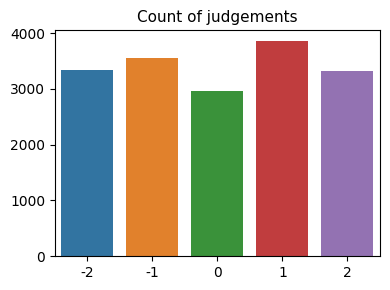

In [11]:
sns.countplot(data=dfAll, x="choice", order=dfAll.choice.sort_values().unique())
fig = plt.gcf()
fig.set_size_inches(4, 3)
#plt.xticks(rotation = 45)

ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel("")

ax.set_title("Count of judgements", fontsize=11)
plt.tight_layout()
plt.savefig("img/participants_judgements.pdf")
plt.show()

- in most cases, users are able to judge the similarity
- there are no observed positional bias effects on the judgement (i.e., left image does not seem to be preferred)

# Participant's device statistics

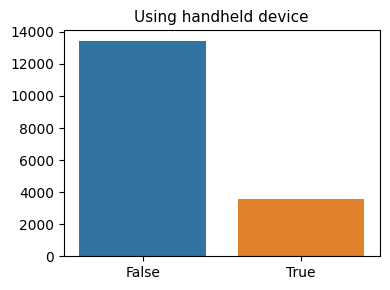

In [12]:
sns.countplot(data=dfAll, x="handheld")
fig = plt.gcf()
fig.set_size_inches(4, 3)
#plt.xticks(rotation = 45)

ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel("")

ax.set_title("Using handheld device", fontsize=11)
plt.tight_layout()
plt.savefig("img/participants_handheld.pdf")
plt.show()

In [13]:
dfAll.loc[dfAll.handheld==True].shape[0] / dfAll.shape[0], dfAll.loc[dfAll.handheld==True].user_id.unique().shape

(0.21161752613649712, (22,))

- a bit over 20% of similarity judgements were conducted via handheld devices; In total 22 users utilized handheld devices 

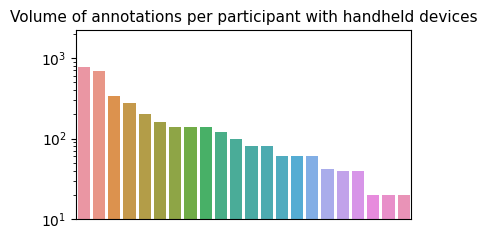

In [14]:
sns.countplot(data=dfAll.loc[dfAll.handheld==True], x="user_id", order = dfAll.loc[dfAll.handheld==True].user_id.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(4, 2.5)
plt.xticks(rotation = 45)

ax = plt.gca()
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_ylim(10,2200)
ax.set_yscale('log')


ax.set_title("Volume of annotations per participant with handheld devices", fontsize=11)

plt.tight_layout()
plt.savefig("img/participants_annotations_handheld.pdf")
plt.show()

- distibution of judgement volumes is similar for both handheld and overall

# Participant's time to decide

In [15]:
#allowing at most 10 minutes to reach a decision - for situations where user left the study and joined again later
sessionMaxTime = 600 
dfAllTTD = dfAll.loc[dfAll.time_spent < sessionMaxTime]
dfAll.shape, dfAllTTD.shape

((17026, 201), (16948, 201))

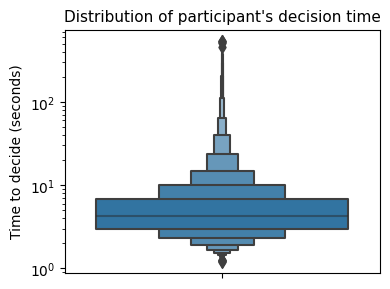

In [16]:
sns.boxenplot(dfAllTTD, y="time_spent")
fig = plt.gcf()
fig.set_size_inches(4, 3)
plt.xticks(rotation = 45)

ax = plt.gca()
#ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("Time to decide (seconds)")
ax.set_yscale('log')


ax.set_title("Distribution of participant's decision time", fontsize=11)

plt.tight_layout()
plt.savefig("img/participants_decisionTime.pdf")
plt.show()

In [17]:
dfAllTTD["time_spent"].describe()

count    16948.000000
mean         7.217137
std         17.944450
min          1.193000
25%          2.954750
50%          4.232000
75%          6.733000
max        546.422000
Name: time_spent, dtype: float64

- all decisions above 1 second. Seemingly enough to decide simple cases
- vast majority of decisions below 10 seconds

In [18]:
dfParticipants["annotationsVolume"] = dfAll.groupby("user_id")["triplet_id"].count()
dfParticipants["medianDecisionTime"] = dfAllTTD.groupby("user_id")["time_spent"].median()
dfParticipants["usingHandheld"] = dfAll.groupby("user_id")["handheld"].max()
dfParticipants

,age_group,education,ml_expert,annotationsVolume,medianDecisionTime,usingHandheld
user_id,,,,,,
45,37-50,phd,yes_big,1266,4.3140,False
51,37-50,phd,yes_big,680,4.7010,True
52,20-26,bachelor,yes_big,260,5.8400,False
54,20-26,bachelor,yes_medium,326,5.4940,False
55,27-36,bachelor,yes_small,360,3.5075,False
...,...,...,...,...,...,...
141,20-26,bachelor,no,260,4.1290,False
143,20-26,high_school,no,20,2.5245,False
147,27-36,bachelor,no,780,2.9040,True


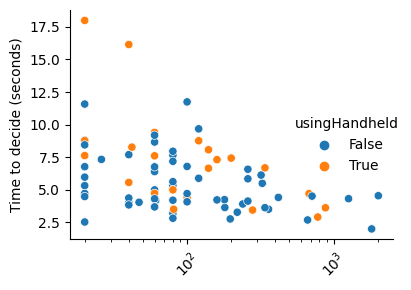

In [19]:
sns.relplot(data=dfParticipants, x="annotationsVolume", y="medianDecisionTime", hue="usingHandheld")
fig = plt.gcf()
fig.set_size_inches(4, 3)
plt.xticks(rotation = 45)

ax = plt.gca()
#ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("Time to decide (seconds)")
ax.set_xscale('log')

plt.tight_layout()
plt.savefig("img/participants_judgementCounts_vs_decisionTime.pdf")
plt.show()

In [20]:
dfParticipants[["annotationsVolume","medianDecisionTime"]].corr()

,annotationsVolume,medianDecisionTime
annotationsVolume,1.000000,-0.293967
medianDecisionTime,-0.293967,1.000000


- there is some rathe weak correlation between volume of completed annotations and time to decision
- probably due to the process of familiarization with the task & GUI
- this does not seem to be affected by participant's demographics or devices